## Metody Nieparametryczne w Statystyce
# Zadanie 10
Za pomocą odpowiednich symulacji zbadać wpływ liczby klas (na które dzielone są dane) odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście 𝜒2 w przypadku weryfikacji zgodności z rozkładem 𝑡-Studenta o różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu 𝑡-Studenta o 𝑘 stopniach swobody i weryfikować hipotezę, że dane mają rozkład 𝑡-Studenta o 𝑘 st. swobody.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [6]:
import numpy as np, pandas as pd
from scipy.stats import t, chisquare
from sklearn import preprocessing
import math
import matplotlib.pyplot as plt

# wyciszenie ostrzeżeń dla testu chi kwadrat 
# który zwraca uwagę na to, że w niektórych przedziałach nie ma obserwacji
import warnings
warnings.filterwarnings('ignore')

2. Badanie czy liczba klas ma znaczenie na odsetek odrzuceń hipotezy głównej

5
8
13
21


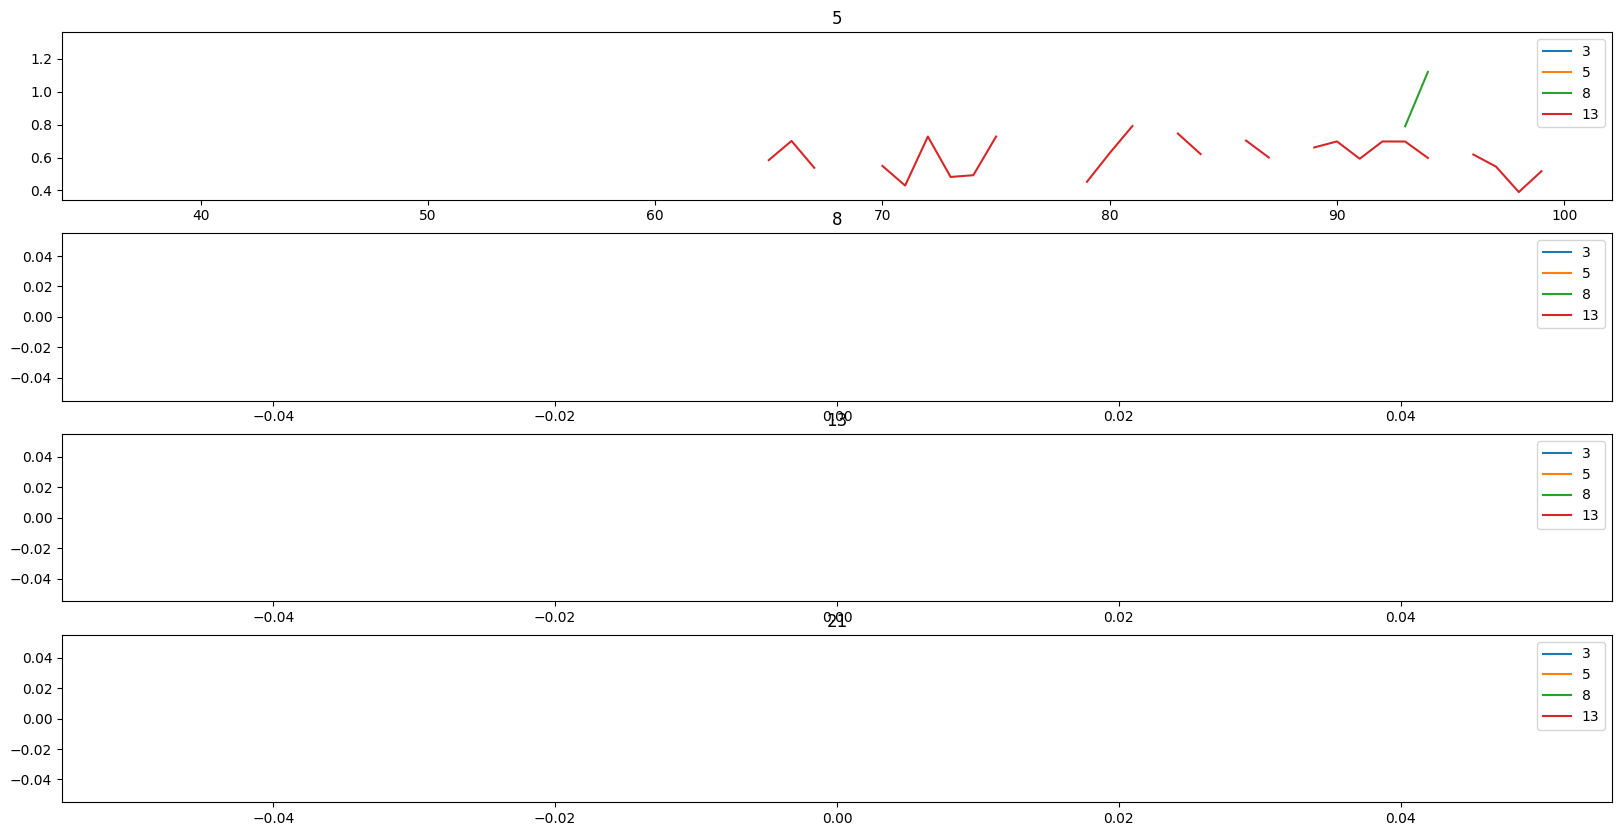

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 10))

for idx, c in enumerate([5, 8, 13, 21]):
    results = pd.DataFrame(columns=["3", "5", "8", "13"])
    buf = []
    
    for n in range (20, 100):
        for i in range (0, 100):
            for df in [3, 5, 8, 13]:
                #generowanie dwóch wektorów liczbowych o rozkładzie normalnym o średniej m i różnych odchyleniach standardowych
                xt1 = np.histogram(np.random.standard_t(df, n), bins=c)[0]
                xt2 = np.histogram(np.random.standard_t(df, n), bins=c)[0]

                xt1freqs = xt1 / np.sum(xt1)
                xt2freqs = xt2 / np.sum(xt2)
                
                #testy
                buf.append(chisquare(xt1freqs, xt2freqs)[0])

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(ax = axes[idx], title = c)